# Solar Radiation Prediction Dataset

In [710]:
Solar_orig=pd.read_csv(r'C:\Users\Prawin\Desktop\Praxis assessment\IML\Assignment-1\solar_train.csv')
solar = Solar_orig.copy()
solar.head()

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,4152,1473879005,9/14/2016 12:00:00 AM,08:50:05,57,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,13047,1476293121,10/12/2016 12:00:00 AM,07:25:21,50,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,7420,1477993220,10/31/2016 12:00:00 AM,23:40:20,47,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,6508,1473013505,9/4/2016 12:00:00 AM,08:25:05,57,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,29110,1481885434,12/16/2016 12:00:00 AM,00:50:34,41,30.23,103,177.55,2.25,06:50:00,17:46:00,1.22


In [711]:
solar.drop(columns=['Id','UNIXTime'],inplace=True)

# Since we have time and date, we donot need UNIX time

In [712]:
solar.head()

,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,9/14/2016 12:00:00 AM,08:50:05,57,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,10/12/2016 12:00:00 AM,07:25:21,50,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,10/31/2016 12:00:00 AM,23:40:20,47,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,9/4/2016 12:00:00 AM,08:25:05,57,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,12/16/2016 12:00:00 AM,00:50:34,41,30.23,103,177.55,2.25,06:50:00,17:46:00,1.22


In [713]:
solar.info()

# As observed there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    26148 non-null  object 
 1   Time                    26148 non-null  object 
 2   Temperature             26148 non-null  int64  
 3   Pressure                26148 non-null  float64
 4   Humidity                26148 non-null  int64  
 5   WindDirection(Degrees)  26148 non-null  float64
 6   Speed                   26148 non-null  float64
 7   TimeSunRise             26148 non-null  object 
 8   TimeSunSet              26148 non-null  object 
 9   Radiation               26148 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 2.0+ MB


In [714]:
solar.describe()

#It looks like there might be outliers in WindDirection(Degrees), Speed and Radiation

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation
count,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000
mean,51.104865,30.422835,75.005239,143.259970,6.248521,208.044780
std,6.213912,0.054724,25.993102,82.988177,3.484166,316.090247
min,34.000000,30.190000,11.000000,0.090000,0.000000,1.130000
25%,46.000000,30.400000,56.000000,81.977500,3.370000,1.230000
50%,50.000000,30.430000,85.000000,147.645000,5.620000,2.710000
75%,55.000000,30.460000,97.000000,179.220000,7.870000,358.945000
max,71.000000,30.560000,103.000000,359.950000,39.370000,1601.260000


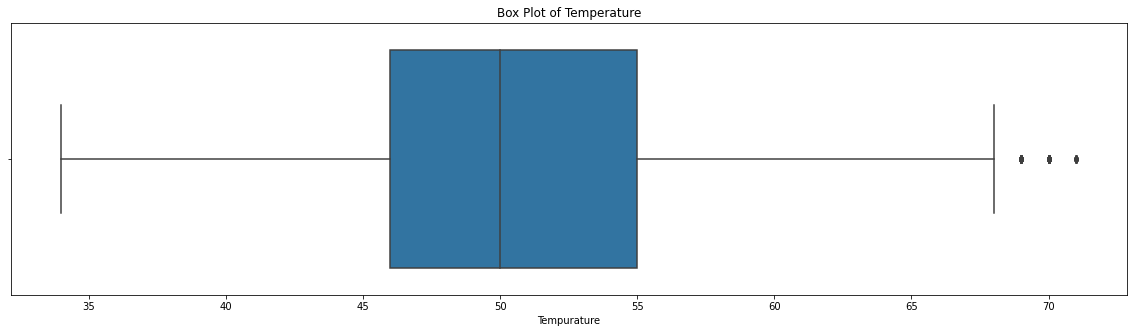

In [715]:
plt.figure(figsize=(20,5))
sns.boxplot(x = solar['Temperature'])
plt.title('Box Plot of Temperature')
plt.xlabel('Tempurature')
plt.show()

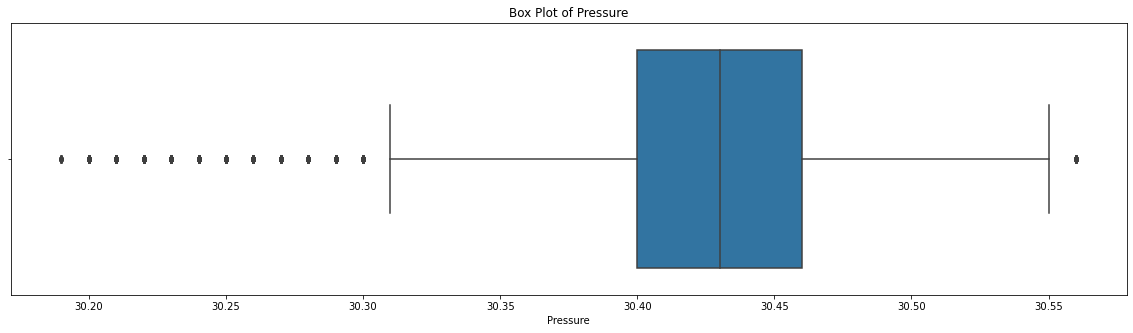

In [716]:
plt.figure(figsize=(20,5))
sns.boxplot(x = solar['Pressure'])
plt.title('Box Plot of Pressure')
plt.xlabel('Pressure')
plt.show()

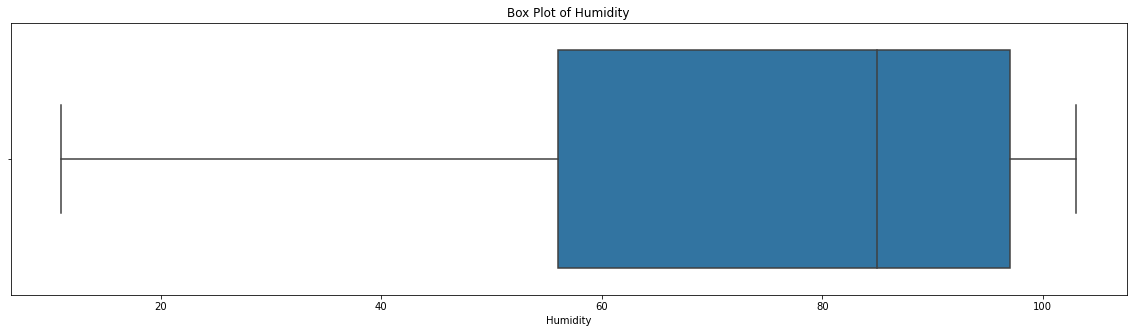

In [717]:
plt.figure(figsize=(20,5))
sns.boxplot(x = solar['Humidity'])
plt.title('Box Plot of Humidity')
plt.xlabel('Humidity')
plt.show()

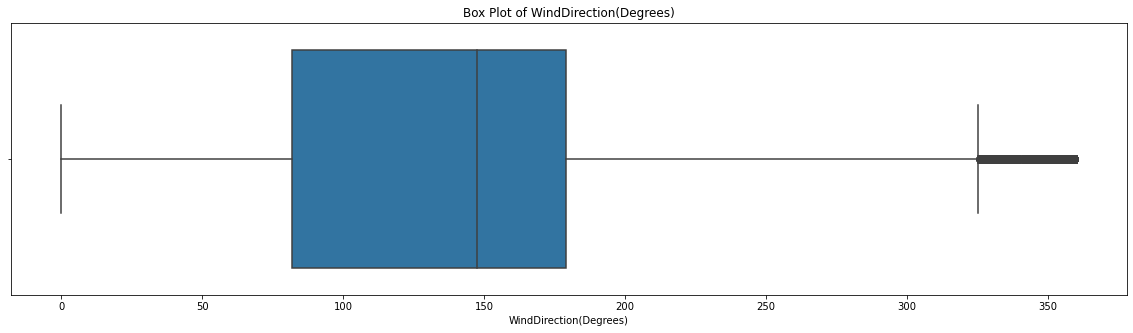

In [718]:
plt.figure(figsize=(20,5))
sns.boxplot(x = solar['WindDirection(Degrees)'])
plt.title('Box Plot of WindDirection(Degrees)')
plt.xlabel('WindDirection(Degrees)')
plt.show()

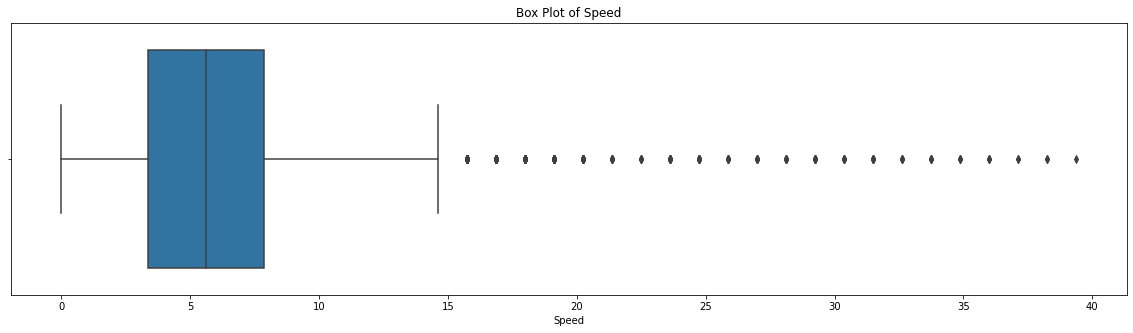

In [719]:
plt.figure(figsize=(20,5))
sns.boxplot(x = solar['Speed'])
plt.title('Box Plot of Speed')
plt.xlabel('Speed')
plt.show()

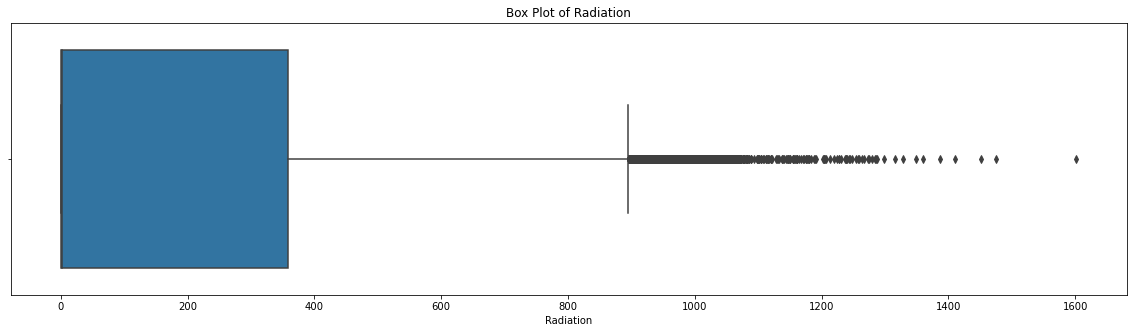

In [720]:
plt.figure(figsize=(20,5))
sns.boxplot(x = solar['Radiation'])
plt.title('Box Plot of Radiation')
plt.xlabel('Radiation')
plt.show()

In [721]:
# As observed from above box plots, there are outliers in columns Radiation, Speed, WindDirection,Pressure and Temperature

In [722]:
# Getting outlier limits for above mentioned columns

num_cols_solar = solar[['Radiation','Speed','WindDirection(Degrees)','Pressure','Temperature']]
Q1 = num_cols_solar.quantile(0.25)
Q3 = num_cols_solar.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower bounds are:\n',lower_bound)
print('-'*70)
print('upper bounds are:\n',upper_bound)

lower bounds are:
 Radiation                -535.34250
Speed                      -3.38000
WindDirection(Degrees)    -63.88625
Pressure                   30.31000
Temperature                32.50000
dtype: float64
----------------------------------------------------------------------
upper bounds are:
 Radiation                 895.51750
Speed                      14.62000
WindDirection(Degrees)    325.08375
Pressure                   30.55000
Temperature                68.50000
dtype: float64


In [723]:
for x in num_cols_solar.columns:
    print('column is:',x)
    print('min side outliers count is:')
    print(solar[solar[x] < lower_bound[x]][x].count())
    print('max side outliers count is:')
    print(solar[solar[x] > upper_bound[x]][x].count())
    print('-'*40)

column is: Radiation
min side outliers count is:
0
max side outliers count is:
1426
----------------------------------------
column is: Speed
min side outliers count is:
0
max side outliers count is:
382
----------------------------------------
column is: WindDirection(Degrees)
min side outliers count is:
0
max side outliers count is:
1259
----------------------------------------
column is: Pressure
min side outliers count is:
1310
max side outliers count is:
26
----------------------------------------
column is: Temperature
min side outliers count is:
0
max side outliers count is:
76
----------------------------------------


In [724]:
for x in num_cols_solar.columns:
    solar.loc[solar[x] > upper_bound[x],x] = upper_bound[x]

solar.loc[solar['Pressure'] < lower_bound['Pressure'],'Pressure'] = lower_bound['Pressure']

In [725]:
num_cols_solar = solar[['Radiation','Speed','WindDirection(Degrees)','Pressure','Temperature']]
Q1 = num_cols_solar.quantile(0.25)
Q3 = num_cols_solar.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower bounds are:\n',lower_bound)
print('-'*70)
print('upper bounds are:\n',upper_bound)

lower bounds are:
 Radiation                -535.34250
Speed                      -3.38000
WindDirection(Degrees)    -63.88625
Pressure                   30.31000
Temperature                32.50000
dtype: float64
----------------------------------------------------------------------
upper bounds are:
 Radiation                 895.51750
Speed                      14.62000
WindDirection(Degrees)    325.08375
Pressure                   30.55000
Temperature                68.50000
dtype: float64


In [726]:
for x in num_cols_solar.columns:
    print('column is:',x)
    print('min side outliers count is:')
    print(solar[solar[x] < lower_bound[x]][x].count())
    print('max side outliers count is:')
    print(solar[solar[x] > upper_bound[x]][x].count())
    print('-'*40)

column is: Radiation
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Speed
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: WindDirection(Degrees)
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Pressure
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Temperature
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------


In [727]:
solar.head()

,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,9/14/2016 12:00:00 AM,08:50:05,57.0,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,10/12/2016 12:00:00 AM,07:25:21,50.0,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,10/31/2016 12:00:00 AM,23:40:20,47.0,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,9/4/2016 12:00:00 AM,08:25:05,57.0,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,12/16/2016 12:00:00 AM,00:50:34,41.0,30.31,103,177.55,2.25,06:50:00,17:46:00,1.22


In [728]:
solar[['Date','12','AM']] = solar['Data'].str.split(' ',expand=True)
solar.drop(columns=['12','AM'],inplace=True)

In [729]:
solar.drop(columns=['Date'],inplace=True)

In [730]:
solar.head()

,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,9/14/2016 12:00:00 AM,08:50:05,57.0,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,10/12/2016 12:00:00 AM,07:25:21,50.0,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,10/31/2016 12:00:00 AM,23:40:20,47.0,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,9/4/2016 12:00:00 AM,08:25:05,57.0,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,12/16/2016 12:00:00 AM,00:50:34,41.0,30.31,103,177.55,2.25,06:50:00,17:46:00,1.22


In [731]:
solar.info()
# Data type of column Data, Time has to be changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    26148 non-null  object 
 1   Time                    26148 non-null  object 
 2   Temperature             26148 non-null  float64
 3   Pressure                26148 non-null  float64
 4   Humidity                26148 non-null  int64  
 5   WindDirection(Degrees)  26148 non-null  float64
 6   Speed                   26148 non-null  float64
 7   TimeSunRise             26148 non-null  object 
 8   TimeSunSet              26148 non-null  object 
 9   Radiation               26148 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 2.0+ MB


In [732]:
solar['Data'] = pd.to_datetime(solar['Data'])

In [733]:
solar['Time'] = pd.to_datetime(solar['Time'], format='%H:%M:%S').dt.time
solar['TimeSunRise'] = pd.to_datetime(solar['TimeSunRise'], format='%H:%M:%S').dt.time
solar['TimeSunSet'] = pd.to_datetime(solar['TimeSunSet'], format='%H:%M:%S').dt.time

In [734]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Data                    26148 non-null  datetime64[ns]
 1   Time                    26148 non-null  object        
 2   Temperature             26148 non-null  float64       
 3   Pressure                26148 non-null  float64       
 4   Humidity                26148 non-null  int64         
 5   WindDirection(Degrees)  26148 non-null  float64       
 6   Speed                   26148 non-null  float64       
 7   TimeSunRise             26148 non-null  object        
 8   TimeSunSet              26148 non-null  object        
 9   Radiation               26148 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 2.0+ MB


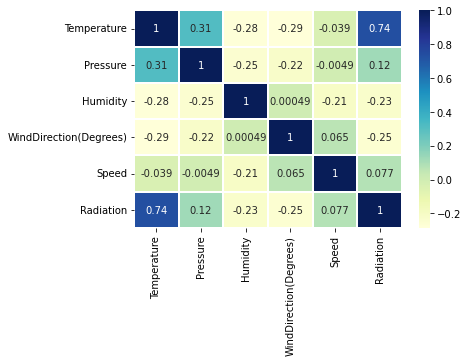

In [735]:
solar_corr = sns.heatmap(solar.corr(),annot=True,cmap ="YlGnBu",linewidths = 0.1)

# Correlation between any of the independent variables is not high.

### EDA

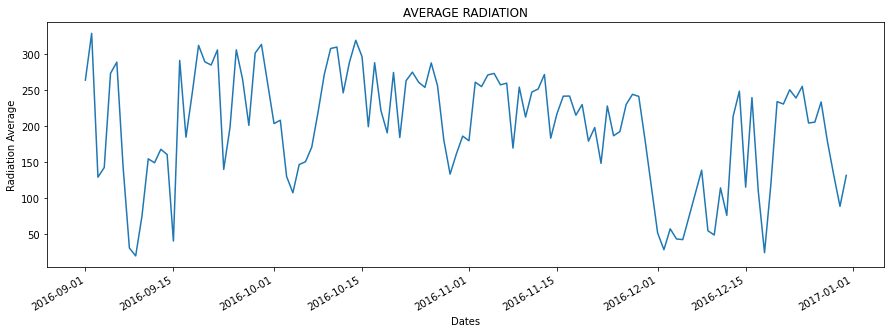

In [736]:
# Check which dates have the highest radiation

plt.figure(figsize=(15,5))
time_radiation = solar.groupby(by='Data')['Radiation'].mean()
time_radiation.plot(kind = 'line')
plt.xlabel('Dates')
plt.ylabel('Radiation Average')
plt.title('AVERAGE RADIATION')
plt.show()

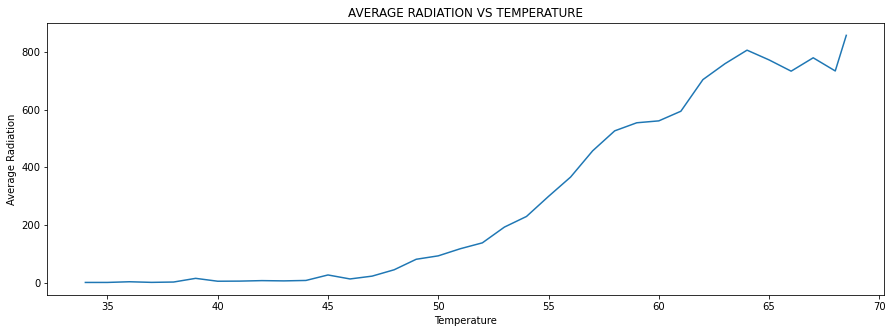

In [737]:
# How is temperature varying with Radiation?

plt.figure(figsize=(15,5))
temp_radiation = solar.groupby(by='Temperature')['Radiation'].mean()
temp_radiation.plot(kind = 'line')
plt.xlabel('Temperature')
plt.ylabel('Average Radiation')
plt.title('AVERAGE RADIATION VS TEMPERATURE')
plt.show()

# As the temperature increases, the radiation value also increases

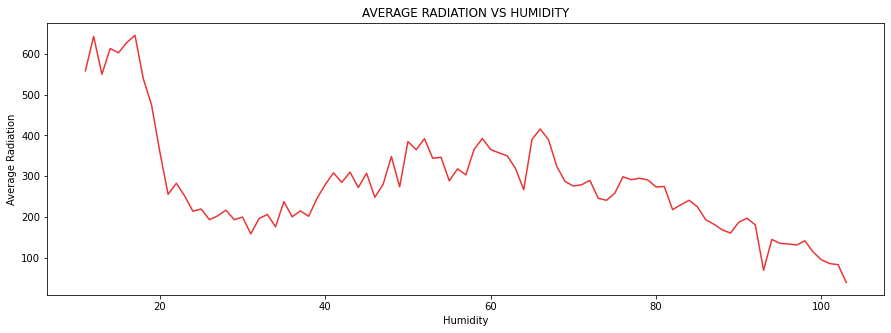

In [738]:
# How is humidity varying with Radiation?

plt.figure(figsize=(15,5))
pressure_radiation = solar.groupby(by='Humidity')['Radiation'].mean()
pressure_radiation.plot(kind = 'line',color = '#eb3434')
plt.xlabel('Humidity')
plt.ylabel('Average Radiation')
plt.title('AVERAGE RADIATION VS HUMIDITY')
plt.show()

# As the humidity increases, the radiation value decreases


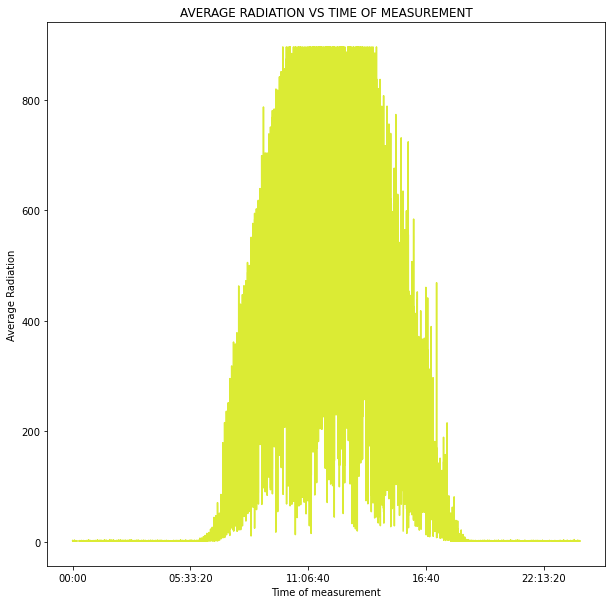

In [739]:
# How does radiation vary from the time of measurement

plt.figure(figsize=(10,10))
radiation_sunrise = solar.groupby(by='Time')['Radiation'].mean()
radiation_sunrise.plot(kind = 'line',color = '#dbeb34')
plt.xlabel('Time of measurement')
plt.ylabel('Average Radiation')
plt.title('AVERAGE RADIATION VS TIME OF MEASUREMENT')
plt.show()

# Highest generation is observed during the time 10 AM and 3 PM. 
# The generation starts from around 6 AM in the morning and ends around 6.30 PM

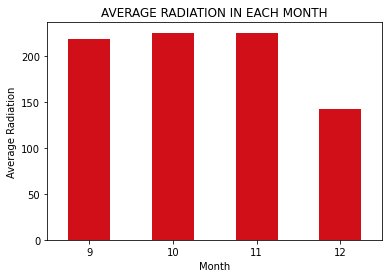

In [740]:
# What is the average radiation observed in each month

month_radiation = solar.groupby(solar['Data'].dt.month)['Radiation'].mean()
month_radiation.plot(kind = 'bar',color='#d10f18')
plt.xlabel('Month')
plt.ylabel('Average Radiation')
plt.title('AVERAGE RADIATION IN EACH MONTH')
plt.xticks(rotation = 0)
plt.show()

# Average Radiation drops significantly in the month of december 

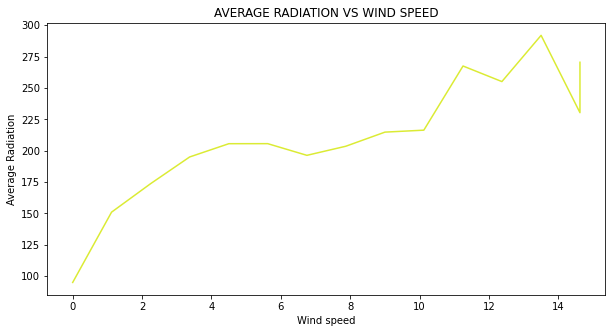

In [741]:
# How does Radiation vary with the wind speed?

plt.figure(figsize=(10,5))
radiation_sunrise = solar.groupby(by='Speed')['Radiation'].mean()
radiation_sunrise.plot(kind = 'line',color = '#dbeb34')
plt.xlabel('Wind speed')
plt.ylabel('Average Radiation')
plt.title('AVERAGE RADIATION VS WIND SPEED')
plt.show()

# As the wind speed increases, the average radiation also increases

In [742]:
y_main_solar = solar['Radiation']
solar.drop(columns=['Radiation','Data','Time','TimeSunRise','TimeSunSet'],inplace=True,axis=1)

In [743]:
x_main_solar = solar.copy()

In [744]:
X_main_solar_num = x_main_solar.select_dtypes(include='number')
ss=MinMaxScaler()
scaled_solar = ss.fit_transform(X_main_solar_num)

In [745]:
scaled_solar = pd.DataFrame(scaled_solar,columns=X_main_solar_num.columns,index = X_main_solar_num.index)

In [746]:
scaled_solar.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,0.666667,0.583333,0.619565,0.081878,0.307798
1,0.463768,0.666667,0.923913,0.445762,0.692202
2,0.376812,0.708333,0.489130,0.367484,0.230506
3,0.666667,0.666667,0.891304,0.118525,0.153899
4,0.202899,0.000000,1.000000,0.546041,0.153899


In [747]:
X_main_solar = scaled_solar.copy()
X_main_solar.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,0.666667,0.583333,0.619565,0.081878,0.307798
1,0.463768,0.666667,0.923913,0.445762,0.692202
2,0.376812,0.708333,0.489130,0.367484,0.230506
3,0.666667,0.666667,0.891304,0.118525,0.153899
4,0.202899,0.000000,1.000000,0.546041,0.153899


In [748]:
X_train_solar, X_test_solar, y_train_solar,y_test_solar = train_test_split(X_main_solar,y_main_solar,test_size=0.3)

In [749]:
print('Shape of X_train is:', X_train_solar.shape)
print('Shape of X_test is:', X_test_solar.shape)
print('Shape of y_train is:', y_train_solar.shape)
print('Shape of y_test is:', y_test_solar.shape)

Shape of X_train is: (18303, 5)
Shape of X_test is: (7845, 5)
Shape of y_train is: (18303,)
Shape of y_test is: (7845,)


In [750]:
k_values = np.arange(1,30,2)
cv_mape_scores_3=[]
train_mape_scores_3=[]
test_mape_scores_3=[]

for a in k_values:
    knn3 = KNeighborsRegressor(n_neighbors=a)
    cv_scores = -cross_val_score(knn3,X_main_solar,y_main_solar,cv = 5,scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores_3.append(cv_mape)
    
    knn3.fit(X_train_solar,y_train_solar)
    train_pred = knn3.predict(X_train_solar)
    train_mape = mean_absolute_percentage_error(y_train_solar,train_pred)
    train_mape_scores_3.append(train_mape)
    
    test_pred = knn3.predict(X_test_solar)
    test_mape = mean_absolute_percentage_error(y_test_solar, test_pred)
    test_mape_scores_3.append(test_mape)

    

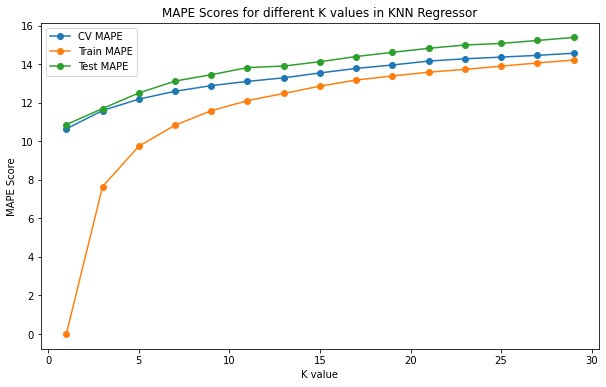

The best K value for CV is 1.


In [751]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores_3, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores_3, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores_3, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores_3)]
print(f"The best K value for CV is {best_k_cv}.")